In [67]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns



## Question 9.10

In [68]:
data = pd.read_csv('Chapter  9 Data Sets/CH09PR10.txt',  header=None, sep='\s+')

In [69]:
data.rename({0:"Y", 1: "X_1", 2: "X_2", 3: "X_3", 4: "X_4"}, axis='columns', inplace=True)

In [70]:
data = data.astype(int)

In [71]:
data.head()

,Y,X_1,X_2,X_3,X_4
0,88,86,110,100,87
1,80,62,97,99,100
2,96,110,107,103,103
3,76,101,117,93,95
4,80,100,101,95,88


In [44]:
def stem_and_leaf_plot(data, scale=1):
    """
    Create a stem and leaf plot for a pandas Series of integers.
    
    Parameters:
    ----------
    data : pandas.Series
        The data to create a stem and leaf plot for
    scale : int, optional (default=1)
        Scale factor to determine how many digits go into the stem
        
    Returns:
    -------
    None
        Prints the stem and leaf plot to the console
    """
    # Convert Series to numpy array if needed
    if isinstance(data, pd.Series):
        data = data.values
    
    # Handle negative numbers by tracking sign separately
    signs = np.sign(data)
    values = np.abs(data)
    
    # Scale the data
    stems = (values // (10 ** scale)).astype(int)
    leaves = (values % (10 ** scale)).astype(int)
    
    # Combine stems, leaves, and original signs
    stems = stems * signs
    
    # Get unique stems and sort them
    unique_stems = sorted(np.unique(stems))
    
    # Print the stem and leaf plot
    print("Stem and Leaf Plot")
    print("Stem | Leaf")
    print("-" * 20)
    
    for stem in unique_stems:
        # Get all leaves for this stem
        stem_leaves = [leaf for s, leaf in zip(stems, leaves) if s == stem]
        
        # Format the stem
        stem_str = f"{stem:4d} |"
        
        # Format and sort the leaves
        leaf_str = " ".join(f"{leaf:0{scale}d}" for leaf in sorted(stem_leaves))
        
        print(f"{stem_str} {leaf_str}")

In [45]:
stem_and_leaf_X_1 = stem_and_leaf_plot(data['X_1'], )

Stem and Leaf Plot
Stem | Leaf
--------------------
   6 | 2
   7 | 4 8
   8 | 4 6 7
   9 | 1 4 6 8
  10 | 0 1 4 4 5 6 9
  11 | 0 2
  12 | 0 0 0
  13 | 3
  14 | 0
  15 | 0


In [46]:
stem_and_leaf_X_2 = stem_and_leaf_plot(data['X_2'], )

Stem and Leaf Plot
Stem | Leaf
--------------------
   7 | 3 7
   8 | 1 3 5 9
   9 | 4 7
  10 | 1 2 7
  11 | 0 3 4 7 8 9
  12 | 0 1 1 1 2 5 9 9


In [47]:
stem_and_leaf_X_3 = stem_and_leaf_plot(data['X_3'], )

Stem and Leaf Plot
Stem | Leaf
--------------------
   8 | 0
   9 | 0 1 3 3 5 5 5 6 7 8 9
  10 | 0 0 2 3 5 6 7 8 9
  11 | 3 4 5 6


In [48]:
stem_and_leaf_X_4 = stem_and_leaf_plot(data['X_4'], )

Stem and Leaf Plot
Stem | Leaf
--------------------
   7 | 4 8
   8 | 0 3 4 5 7 8 8 9
   9 | 0 5 5 7
  10 | 0 2 2 3 3 4 5 8 8 9
  11 | 0


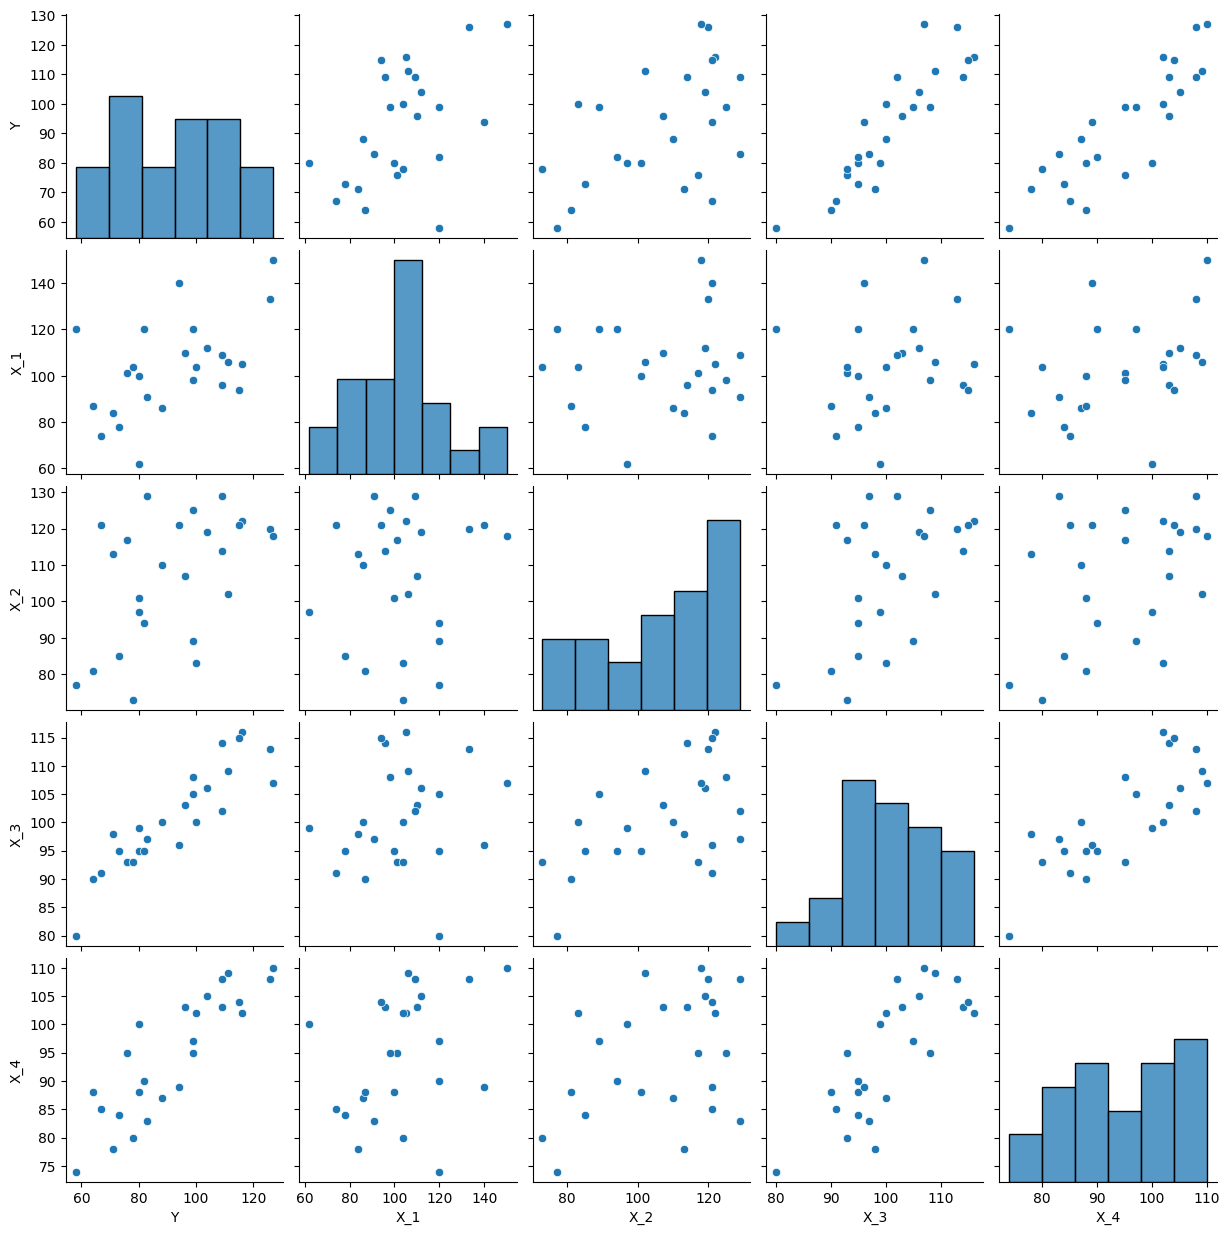

In [25]:
sns.pairplot(data)

<Axes: >

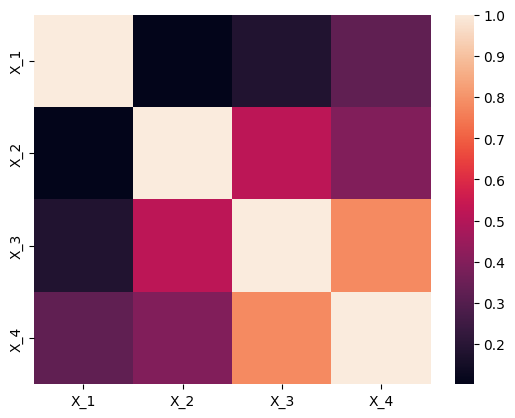

In [26]:
sns.heatmap(data[[x for x in data.columns if x != "Y"]].corr())

## 9.11 Question

In [29]:
model_all_vars = smf.ols(formula="Y ~ X_1 + X_2 + X_3 + X_4", data=data).fit()

In [31]:
model_all_vars.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     129.7
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.26e-14
Time:                        13:00:18   Log-Likelihood:                -67.951
No. Observations:                  25   AIC:                             145.9
Df Residuals:                      20   BIC:                             152.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.3818      9.941    -12.512      0.000    -145.119    -103.645
X_1            0.2957      0.044      6.725      0.000       0.204       0.387
X_2            0.0483      0.057      0.853      0.404      -0.070       0.166
X_3            1.3060      0.164      7.959      0.000       0.964       1.648
X_4            0.5198      0.132      3.940      0.001       0.245       0.795
==============================================================================
Omnibus:                        3.256   Durbin-Watson:                   1.148
Prob(Omnibus):                  0.196   Jarque-Bera (JB):                1.419
Skew:                           0.139   Prob(JB):                        0.492
Kurtosis:                       1.867   Cond. No.                     2.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

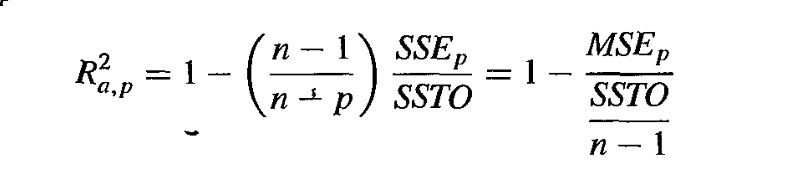

## 9.16 question

In [51]:
data2 = pd.read_csv('Chapter  9 Data Sets/CH09PR15.txt',  header=None, sep='\s+')

In [53]:
data2.rename({0:"Y", 1: "X_1", 2: "X_2", 3: "X_3"}, axis='columns', inplace=True)

In [54]:
data2

,Y,X_1,X_2,X_3
0,132.0,0.71,38.0,71.0
1,53.0,1.48,78.0,69.0
2,50.0,2.21,69.0,85.0
3,82.0,1.43,70.0,100.0
4,110.0,0.68,45.0,59.0
5,100.0,0.76,65.0,73.0
6,68.0,1.12,76.0,63.0
7,92.0,0.92,61.0,81.0
8,60.0,1.55,68.0,74.0
9,94.0,0.94,64.0,87.0


In [61]:
full_model = smf.ols(formula="Y ~ X_1*X_2 + X_1*X_3 + X_2*X_3 + I(X_1**2) + I(X_2**2)+I(X_3**2)", data=data2).fit()
full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     21.56
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           3.53e-09
Time:                        14:10:49   Log-Likelihood:                -122.73
No. Observations:                  33   AIC:                             265.5
Df Residuals:                      23   BIC:                             280.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      68.4090     98.118      0.697      0.493    -134.564     271.382
X_1           -93.9002     48.001     -1.956      0.063    -193.199       5.398
X_2            -1.2208      1.754     -0.696      0.493      -4.850       2.408
X_1:X_2         0.4225      0.733      0.576      0.570      -1.094       1.939
X_3             3.3105      1.796      1.843      0.078      -0.404       7.025
X_1:X_3        -0.0309      0.613     -0.050      0.960      -1.299       1.237
X_2:X_3        -0.0119      0.019     -0.625      0.538      -0.051       0.028
I(X_1 ** 2)     8.6452     14.996      0.577      0.570     -22.376      39.667
I(X_2 ** 2)     0.0088      0.010      0.925      0.365      -0.011       0.028
I(X_3 ** 2)    -0.0116      0.010     -1.124      0.272      -0.033       0.010
==============================================================================
Omnibus:                        2.395   Durbin-Watson:                   2.172
Prob(Omnibus):                  0.302   Jarque-Bera (JB):                1.476
Skew:                          -0.505   Prob(JB):                        0.478
Kurtosis:                       3.227   Cond. No.                     3.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Question 9.20

In [ ]:
data_3 = pd.read_csv('Chapter  9 Data Sets/APPENC03.txt',  header=None, sep='\s+')
data_3.rename

,0,1,2,3,4,5,6,7
0,1,3.15,2.198,498,1,1,Sep,1999
1,2,2.52,2.186,510,0,0,Oct,1999
2,3,2.64,2.293,422,1,1,Nov,1999
3,4,2.55,2.420,858,0,1,Dec,1999
4,5,2.69,2.179,566,1,0,Jan,2000
5,6,2.38,2.207,536,0,0,Feb,2000
6,7,3.02,2.127,585,1,1,Mar,2000
7,8,2.52,2.206,310,1,0,Apr,2000
8,9,2.45,2.305,211,0,0,May,2000
9,10,2.42,2.260,504,0,1,Jun,2000


## Question 9.21 

In [ ]:
model_all_vars = smf.ols(formula="Y ~ X_1 + X_2 + X_3 + X_4", data=data).fit()

In [72]:
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np

# Assuming your data is already in a DataFrame called 'data'
# with columns 'Y', 'X_1', 'X_2', 'X_3', 'X_4'

def forward_stepwise_regression(data, response, predictors, alpha_enter=0.05, alpha_remove=0.10):
    """
    Perform forward stepwise regression.
    
    Parameters:
    - data: DataFrame containing all variables
    - response: Name of response variable (Y)
    - predictors: List of predictor variable names
    - alpha_enter: Critical threshold for adding a variable
    - alpha_remove: Critical threshold for removing a variable
    
    Returns:
    - Best model and the sequence of selected variables
    """
    current_predictors = []
    remaining_predictors = predictors.copy()
    history = []
    
    # Start with intercept-only model
    best_model = smf.ols(formula=f"{response} ~ 1", data=data).fit()
    print(f"Starting with intercept-only model: AIC = {best_model.aic:.4f}")
    
    step = 1
    while remaining_predictors:
        print(f"\nIteration {step}: Testing addition of variables")
        
        # Try adding each remaining predictor
        best_pvalue = float('inf')
        best_predictor = None
        candidate_model = None
        
        for predictor in remaining_predictors:
            # Create formula with current predictors plus the candidate
            formula = f"{response} ~ " + " + ".join(current_predictors + [predictor])
            model = smf.ols(formula=formula, data=data).fit()
            
            # Get p-value for the newly added predictor
            p_values = model.pvalues
            new_predictor_pvalue = p_values[predictor]
            
            print(f"  Testing {predictor}: p-value = {new_predictor_pvalue:.4f}")
            
            # If this predictor has the lowest p-value so far and it's below alpha_enter
            if new_predictor_pvalue < best_pvalue and new_predictor_pvalue < alpha_enter:
                best_pvalue = new_predictor_pvalue
                best_predictor = predictor
                candidate_model = model
        
        # If we found a predictor to add
        if best_predictor:
            print(f"  Adding {best_predictor} with p-value = {best_pvalue:.4f}")
            current_predictors.append(best_predictor)
            remaining_predictors.remove(best_predictor)
            best_model = candidate_model
            history.append((step, "add", best_predictor, best_pvalue))
            
            # Check if any variable should be removed
            # Only done after we have at least 2 predictors
            if len(current_predictors) > 1:
                print("  Checking if any variables should be removed...")
                remove_predictor = None
                highest_pvalue = 0
                
                for predictor in current_predictors:
                    predictor_pvalue = best_model.pvalues[predictor]
                    
                    if predictor_pvalue > alpha_remove and predictor_pvalue > highest_pvalue:
                        highest_pvalue = predictor_pvalue
                        remove_predictor = predictor
                
                if remove_predictor:
                    print(f"  Removing {remove_predictor} with p-value = {highest_pvalue:.4f}")
                    current_predictors.remove(remove_predictor)
                    remaining_predictors.append(remove_predictor)
                    
                    # Refit model without the removed predictor
                    formula = f"{response} ~ " + " + ".join(current_predictors)
                    best_model = smf.ols(formula=formula, data=data).fit()
                    history.append((step, "remove", remove_predictor, highest_pvalue))
        else:
            # No more predictors to add
            print("  No more variables meet the criteria for entry.")
            break
            
        # Print current model summary
        print(f"\nCurrent model after iteration {step}:")
        print(f"  Formula: {response} ~ " + " + ".join(current_predictors))
        print(f"  AIC: {best_model.aic:.4f}")
        print(f"  R-squared: {best_model.rsquared:.4f}")
        print(f"  Adjusted R-squared: {best_model.rsquared_adj:.4f}")
        
        step += 1
    
    print("\nFinal model:")
    print(f"  Formula: {response} ~ " + " + ".join(current_predictors))
    print(f"  AIC: {best_model.aic:.4f}")
    print(f"  R-squared: {best_model.rsquared:.4f}")
    print(f"  Adjusted R-squared: {best_model.rsquared_adj:.4f}")
    
    return best_model, history

# Run the stepwise regression
response = 'Y'  # job proficiency
predictors = ['X_1', 'X_2', 'X_3', 'X_4']
alpha_enter = 0.05  # threshold for adding variables
alpha_remove = 0.10  # threshold for removing variables

best_model, history = forward_stepwise_regression(data, response, predictors, alpha_enter, alpha_remove)

# Print parameter estimates for the final model
print("\nParameter Estimates:")
print(best_model.summary().tables[1])

# Print history of variable additions and removals
print("\nVariable Selection History:")
for step, action, var, pvalue in history:
    print(f"Step {step}: {action.capitalize()} {var} (p-value: {pvalue:.4f})")

Starting with intercept-only model: AIC = 220.2491

Iteration 1: Testing addition of variables
  Testing X_1: p-value = 0.0085
  Testing X_2: p-value = 0.0115
  Testing X_3: p-value = 0.0000
  Testing X_4: p-value = 0.0000
  Adding X_3 with p-value = 0.0000

Current model after iteration 1:
  Formula: Y ~ X_3
  AIC: 181.4155
  R-squared: 0.8047
  Adjusted R-squared: 0.7962

Iteration 2: Testing addition of variables
  Testing X_1: p-value = 0.0000
  Testing X_2: p-value = 0.6995
  Testing X_4: p-value = 0.0016
  Adding X_1 with p-value = 0.0000
  Checking if any variables should be removed...

Current model after iteration 2:
  Formula: Y ~ X_3 + X_1
  AIC: 156.6741
  R-squared: 0.9330
  Adjusted R-squared: 0.9269

Iteration 3: Testing addition of variables
  Testing X_2: p-value = 0.5606
  Testing X_4: p-value = 0.0007
  Adding X_4 with p-value = 0.0007
  Checking if any variables should be removed...

Current model after iteration 3:
  Formula: Y ~ X_3 + X_1 + X_4
  AIC: 144.7942
  R

In [73]:
final_model = smf.ols(formula="Y ~ X_1 + X_3 + X_4", data=data).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     175.0
Date:                Wed, 05 Mar 2025   Prob (F-statistic):           5.16e-15
Time:                        14:34:27   Log-Likelihood:                -68.397
No. Observations:                  25   AIC:                             144.8
Df Residuals:                      21   BIC:                             149.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -124.2000      9.874    -12.578      0.000    -144.734    -103.666
X_1            0.2963      0.044      6.784      0.000       0.205       0.387
X_3            1.3570      0.152      8.937      0.000       1.041       1.673
X_4            0.5174      0.131      3.948      0.001       0.245       0.790
==============================================================================
Omnibus:                        2.687   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.261   Jarque-Bera (JB):                1.314
Skew:                           0.154   Prob(JB):                        0.519
Kurtosis:                       1.920   Cond. No.                     2.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sum = 0 
for i in range(len(data)): 
  data_i = data.copy()
  data_i.drop(i, axis='rows', inplace=True)
  y_hat = smf.ols(formula="Y ~ X_1 + X_3 + X_4", data=data_i).fit()
  i_features = data.iloc[i, 1:]
  y_hat_i = float(y_hat.predict(i_features).iloc[0])
  true_y = data.iloc[i, 0]
  sum += (true_y - y_hat_i)**2

print(f"The press statistic is: {sum}")

The press statistic is: 471.45197756957646


In [95]:

print(f"The sum of squares error is: {np.sum(final_model.resid**2)}")

The sum of squares error is: 348.19700765899853
